In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from matplotlib import rcParams
rcParams['font.size'] = 14
rcParams['legend.fontsize'] = 'small'
rcParams['figure.titlesize'] = 'large'

import unicodedata
import string
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

import pickle

## Naive Bayes

#### In bag-of-words featurization of text, all features are assumed independent (*naive*) 

*Correlated features are not treated right.*

Naive Bayes is nice computationally for n << p bc it just sums...

For every document, calculate the probability that the document belongs to each class and choose the class with the highest probability.

####  Cross validate for Laplace Smoothing $\alpha$ parameter

In [3]:
tfidf_df = pd.read_csv('../data/tfidf_df.csv')
y = tfidf_df.pop('y')
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=1)

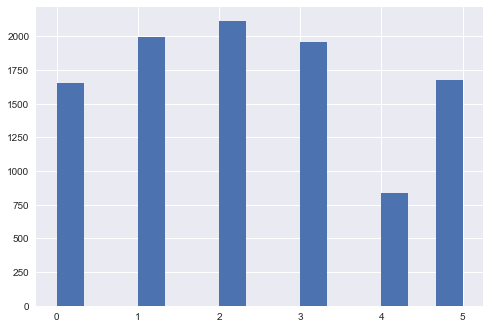

In [4]:
fig, ax = plt.subplots()
y.hist(bins=15);

In [10]:
# Establish a (REALLY BAD) baseline...
unique, counts = np.unique(y, return_counts=True)

guess = 0
for count in counts:
    guess += (count / len(y))*(1/len(unique))

print(f'Random Guess 6 Labels: {round(guess*100,2)}')

Random Guess 6 Labels: 16.67


In [12]:
alphas = np.arange(0.01, 1, .05)

In [13]:
train_scores = []
test_scores = []
for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    cv_result = cross_validate(nb, X_train, y_train, cv=3, n_jobs=-1,
                   verbose=1, return_train_score=True)
    train_scores.append(np.mean(cv_result['train_score']))
    test_scores.append(np.mean(cv_result['test_score']))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out

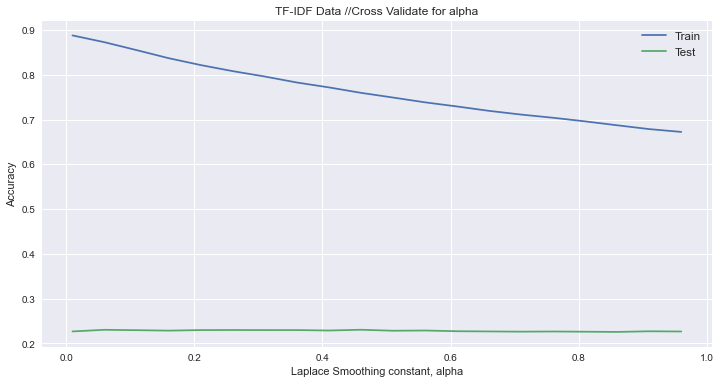

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(alphas, train_scores, label='Train')
ax.plot(alphas, test_scores, label='Test')
ax.set_title('TF-IDF Data //Cross Validate for alpha')
ax.set_xlabel('Laplace Smoothing constant, alpha')
ax.set_ylabel('Accuracy')
ax.set_ylabel
ax.legend();

In [15]:
# Using the best one
nb = MultinomialNB(alpha=alphas[np.argmax(test_scores)])
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(f'Accuracy: {score(y_test, y_pred)}')

mat = confusion_matrix(y_test, y_pred)
labels = list(np.unique(y))
fig = plt.figure()
ax = fig.add_subplot(111)
cm = ax.matshow(mat, cmap='magma')
ax.grid(False)
plt.title("TF-IDF Data - How fake is the news?", y=1.2)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(len(mat)):
    for j in range(len(mat)):
        text = ax.text(j, i, mat[i, j],
                       ha="center", va="center", color='w')

fig.colorbar(cm);

NameError: name 'score' is not defined